In [1]:
from util import setup_notebook
setup_notebook()
%load_ext autoreload
%autoreload 2

In [2]:
import altair as alt
from testmining.apfd_plot import read_apfd, collect_apfd, STRATEGIES

In [3]:
df = collect_apfd(STRATEGIES)
df.head()

travisJobId  untreated    random       lru  recently-failed  matrix-naive  \
0      1144787   0.919355  0.306452  0.295699         0.994624      0.919355   
1      1152783   0.919355  0.876344  0.360215         0.994624      0.919355   
2      2567969   0.519802  0.866337  0.519802         0.519802      0.519802   
3      2567976   0.519802  0.331683  0.539604         0.995050      0.519802   
4      5237050   0.063107  0.131068  0.305825         0.995146      0.995146   

   matrix-conditional-prob  matrix-path-similarity  matrix-file-similarity  \
0                 0.919355                0.994624                0.994624   
1                 0.919355                0.994624                0.994624   
2                 0.519802                0.519802                0.519802   
3                 0.519802                0.995050                0.995050   
4                 0.063107                0.995146                0.995146   

   matrix-tc-similarity  matrix-recently-changed  path-tc-overlap     bloom  \
0              0.919355                 0.994624         0.489247  0.919355   
1              0.919355                 0.994624         0.994624  0.919355   
2              0.519802                 0.519802         0.876238  0.519802   
3              0.519802                 0.995050         0.767327  0.519802   
4              0.995146                 0.995146         0.839806  0.063107   

   optimal-failure  optimal-failure-duration  
0         0.994624                  0.994624  
1         0.994624                  0.994624  
2         0.995050                  0.995050  
3         0.995050                  0.995050  
4         0.995146                  0.995146

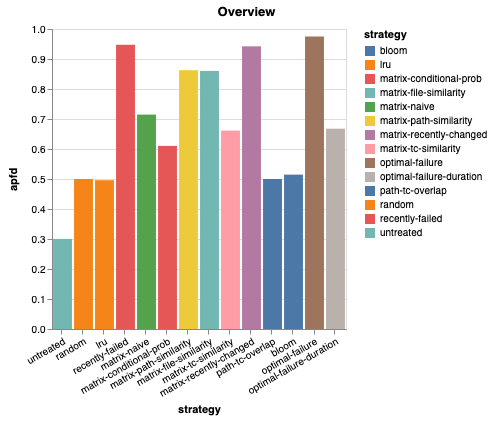

In [4]:
from testmining.apfd_plot import apfd_bar_chart
apfd_bar_chart('Overview', df)

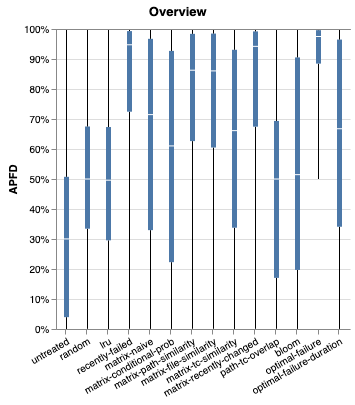

In [5]:
from testmining.apfd_plot import apfd_boxplot, boxplot_transform
apfd_boxplot(boxplot_transform(df), 'Overview')

TODO
- "giant Gantt chart": über wie viele Builds bleibt der gleiche Test rot?
- "time to fix": im Schnitt, wie viele Builds dauert es, bis der Test gefixt ist? 
- für beide gilt: je länger rot, desto besser ist die recently-failed-strategy (wahrscheinlich)
- entweder schlagen oder einbetten
- überlegen: composite strategien: eine Strategie auswählen, für die verbleibenden Tests andere fragen
- Faz: sollte noch implementiert werden
- mit Devaluation in der Matrix-Strategie arbeiten
- Devaluation einmal evaluieren
- mehr Projekte evaluieren
- Ähnlichkeitssuche


* Scatter-Plot über alle Strategien
* Representativität: 15-30 Projekte
* evtl. zwei "Typen" / "Patterns" herausstellen: verstehen, warum einzelne Strategien gut performen
* Verstehen / erklären, warum die Matrix allgemeiner ist, und wann die besser sein kann
* robuster
* basteln / gliederung / präsi / schreiben
* erstmal zurückgestellt: live / ressourcenbeschränkung


Ideas:
* PCA (Matrix zentrierenm, Diagonale abziehen)
* Matrix-Faktorisierung: sklearn mit NMF (Python-NB von Toni)
* Versuchen, die Maße für Ähnlichkeit zwischen verschiedenen TC und Files zu kombinieren
* Werte in der Matrix normalisieren (Wahrscheinlichkeiten)
* Prior Verteilung: alle Werte + Alpha, Zeilensummer + |tc|*alpha, zeilensumme + |files| * alpah
* Dirichlet-Smoothing
* Dirichlet-Prior
